In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os

import scipy.optimize as opt
%matplotlib inline

In [11]:
# importing the data
path = '/Users/ldang/Desktop/HackSession-WFIRST/simulated_data'
dirs = os.listdir(path)
nb   = len(dirs)

In [50]:
def rect(x, t0, tE, am):
    '''
    x  = time array
    t0 = time of center of the top-hat
    tE = half duration of the top-hat
    am = amplitude
    '''
    x0 = x - t0
    return am*np.where(abs(x0)<=tE, 1, 0)

def sinusoid(x, amp, off,P):
    '''
    amp = amplitude
    off = offset
    '''
    x0 = (x-off)
    return amp*np.sin(x0)

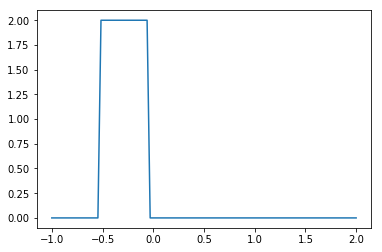

In [61]:
# example of the top hat function
xt = np.linspace(-1,2,100)
yt = rect(x, 0.5, 0.5, 2)
plt.plot(xt,yt)

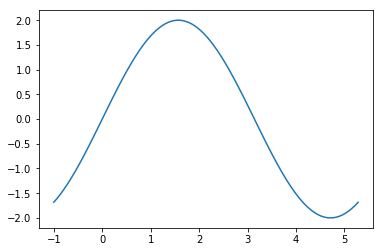

In [96]:
# making sure the sinusoids behaves...

xs = np.linspace(-1,2*np.pi-1,100)
ys = sinusoid(xs, 2, 0.0, 3)
plt.figure()
plt.plot(xs,ys)
# plt.axhline(y=0)
# plt.axvline(x=0)
# plt.axhline(y=np.max(ys))
# plt.axvline(x=xs[np.argmax(ys)])

###  fitting top-hat
I 

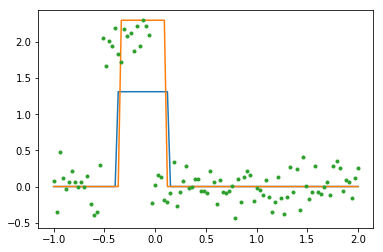

In [95]:
# generating noisy data
xdata = xt
ydata = yt+np.random.normal(0.0, 0.2, len(yt))

# give p0 [t0, tE, am]
t0_ini = xdata[np.argmax(ydata)]
tE_ini = 0.5*(xt[1]-xt[0])*len(np.where(abs(ydata-np.median(ydata))>2*np.std(ydata))[0])
am_ini = np.max(ydata)

paramt = [t0_ini, tE_ini, am_ini]

# optmizing
popt, pcov = opt.curve_fit(rect, xdata, ydata, p0=paramt)

guess    = rect(xdata, *paramt)
solution = rect(xdata, *popt)

plt.figure()
plt.plot(xt, solution)
plt.plot(xt, guess)
plt.plot(xt, ydata, '.')